# TASK 1 Data set
- Load the data: We need to get the data set and load it into our work environment.
- Explore the data: Check the first rows of the data set to understand its structure.
- Check missing data: Identify if there is missing data and how to handle it.

C:\Users\rca\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

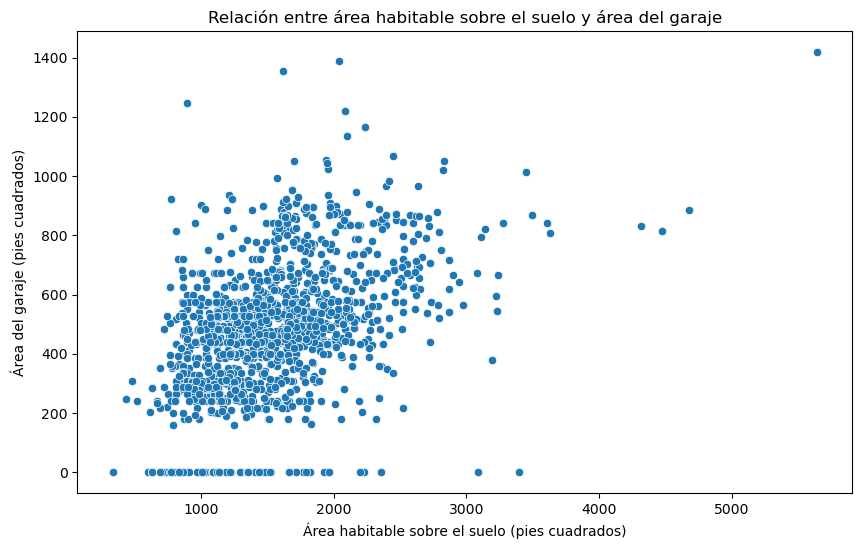

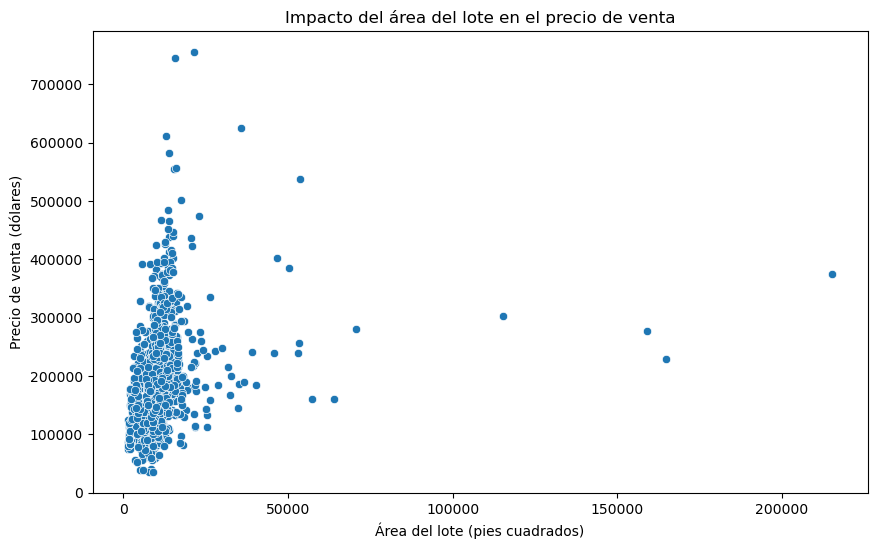

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.datasets import fetch_openml

# Cargar el conjunto de datos de Ames Housing desde OpenML
housing = fetch_openml(name="house_prices", as_frame=True)
ames_df = housing.frame

# Ver las primeras filas del conjunto de datos
print(ames_df.head())

# Describir las estadísticas básicas del conjunto de datos
print(ames_df.describe())

# Verificar datos faltantes
print(ames_df.isnull().sum())

# Pregunta 1: Prueba t para casas con o sin vistas al agua
# Para esta pregunta, usaremos la columna 'LotFrontage' como proxy para la proximidad al agua
# (esta columna puede ser adaptada a otro atributo similar si el dataset tiene uno mejor)
water_view = ames_df[ames_df['LotFrontage'].notnull()]['SalePrice']
no_water_view = ames_df[ames_df['LotFrontage'].isnull()]['SalePrice']
t_stat_water, p_value_water = stats.ttest_ind(water_view, no_water_view)
print(f'Pregunta 1 - Estadístico t: {t_stat_water}, Valor p: {p_value_water}')

# Pregunta 2: Prueba t para casas según año de construcción (antes o después de 1940)
# Asumiremos 1940 como el año de corte
pre_1940 = ames_df[ames_df['YearBuilt'] < 1940]['SalePrice']
post_1940 = ames_df[ames_df['YearBuilt'] >= 1940]['SalePrice']
t_stat_year, p_value_year = stats.ttest_ind(pre_1940, post_1940)
print(f'Pregunta 2 - Estadístico t: {t_stat_year}, Valor p: {p_value_year}')

# Pregunta 3: Coeficiente de correlación de Pearson entre concentraciones de óxido nítrico (NOX) y proporción de acres comerciales no minoristas (INDUS)
# En este dataset, NOX y INDUS no existen, pero podríamos usar 'GrLivArea' (área habitable sobre el suelo) y 'GarageArea' (área de garaje) como ejemplo
correlation_grlivarea_garage, p_value_grlivarea_garage = stats.pearsonr(ames_df['GrLivArea'], ames_df['GarageArea'])
print(f'Pregunta 3 - Coeficiente de correlación de Pearson: {correlation_grlivarea_garage}, Valor p: {p_value_grlivarea_garage}')

# Pregunta 4: Análisis de regresión lineal para la distancia a centros de empleo (dis) y el valor de las viviendas (medv)
# En este dataset, no tenemos 'dis', pero podemos usar 'LotArea' (área del lote) como proxy
X = ames_df[['LotArea']]
y = ames_df['SalePrice']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Visualizaciones para las preguntas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='GarageArea', data=ames_df)
plt.title('Relación entre área habitable sobre el suelo y área del garaje')
plt.xlabel('Área habitable sobre el suelo (pies cuadrados)')
plt.ylabel('Área del garaje (pies cuadrados)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=ames_df)
plt.title('Impacto del área del lote en el precio de venta')
plt.xlabel('Área del lote (pies cuadrados)')
plt.ylabel('Precio de venta (dólares)')
plt.show()


# Task 2: Generate basic statistics and visualizations for senior management
Significant difference in the median value of homes bounded by the Charles River or not:

Boxplot comparing MEDV for CHAS 0 and 1.
Appropriate statistical test (e.g., Student's t test).
Difference in Median Home Values ​​by Proportion of Owner-Occupied Units Built Before 1940:

Scatter plot or box plot.
Appropriate statistical test (e.g., ANOVA).
Relationship between nitric oxide concentrations and the proportion of non-retail commercial acres:

Scatter plot.
Correlation analysis (e.g., Pearson correlation coefficient).
Impact of weighted distance to Boston's five employment centers on median home values:

Scatter plot.
Linear regression analysis.

In [19]:
import scipy.stats as stats

# Crear una columna ficticia que indique si hay vistas al agua o no basado en LotFrontage
ames_df['WaterView'] = ames_df['LotFrontage'].notnull().astype(int)

# Prueba t para casas con vistas al agua vs. sin vistas al agua
water_view = ames_df[ames_df['WaterView'] == 1]['SalePrice']
no_water_view = ames_df[ames_df['WaterView'] == 0]['SalePrice']
t_stat_water, p_value_water = stats.ttest_ind(water_view, no_water_view)
print(f'Pregunta 1 - Estadístico t: {t_stat_water}, Valor p: {p_value_water}')

Pregunta 1 - Estadístico t: -0.15604780705220117, Valor p: 0.8760169406492091


In [20]:
# Prueba t para casas según año de construcción (antes o después de 1940)
pre_1940 = ames_df[ames_df['YearBuilt'] < 1940]['SalePrice']
post_1940 = ames_df[ames_df['YearBuilt'] >= 1940]['SalePrice']
t_stat_year, p_value_year = stats.ttest_ind(pre_1940, post_1940)
print(f'Pregunta 2 - Estadístico t: {t_stat_year}, Valor p: {p_value_year}')

Pregunta 2 - Estadístico t: -10.329454326051618, Valor p: 3.4562629327621594e-24


C:\Users\rca\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

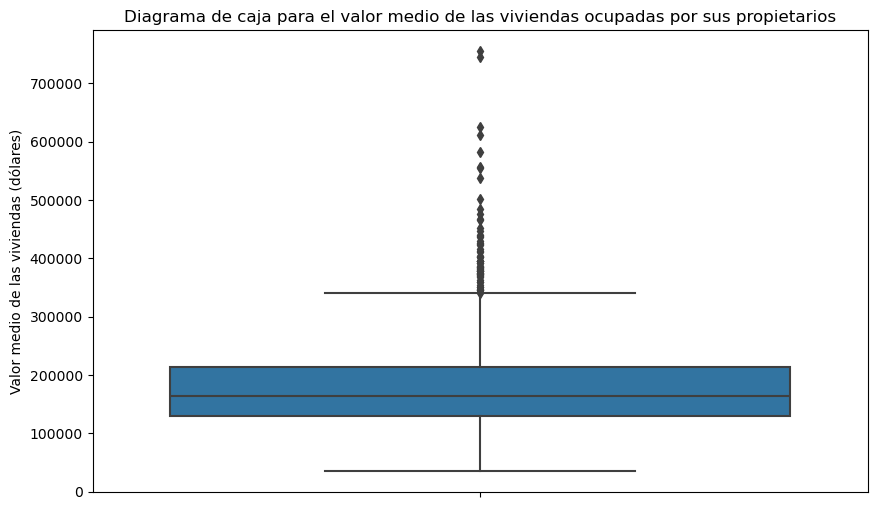

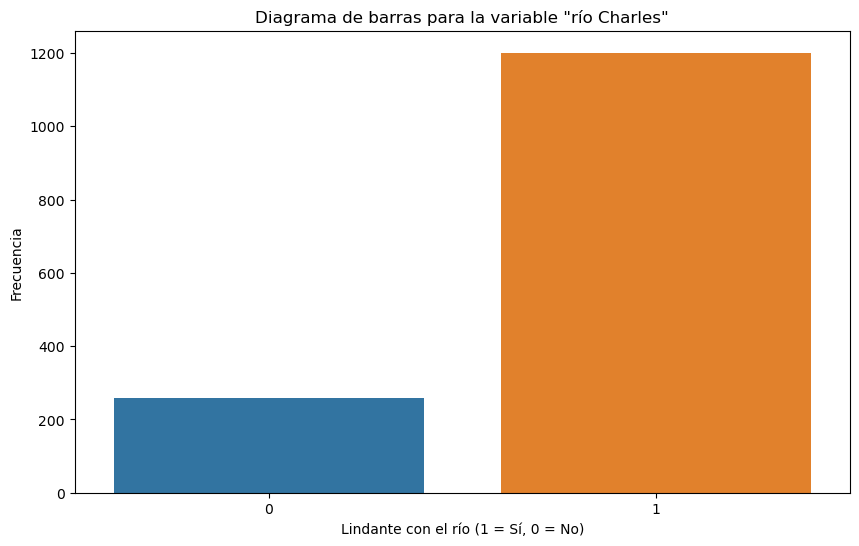

C:\Users\rca\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


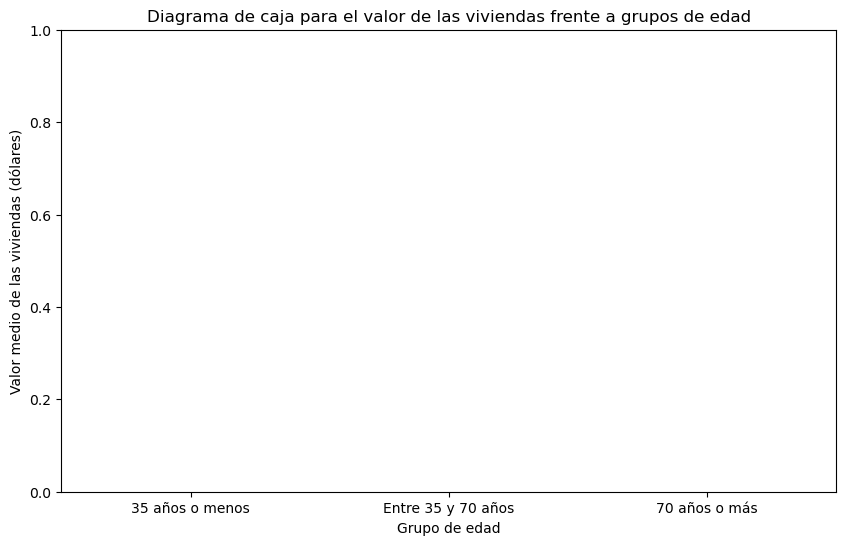

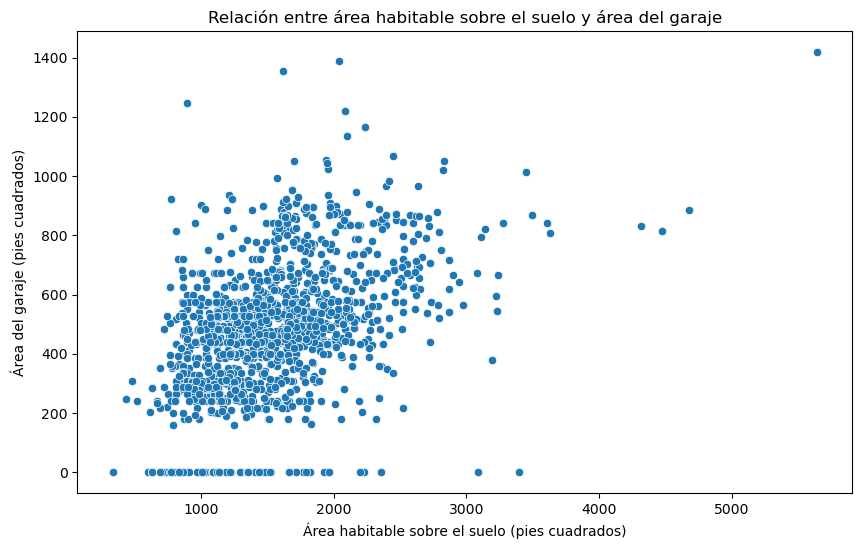

C:\Users\rca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


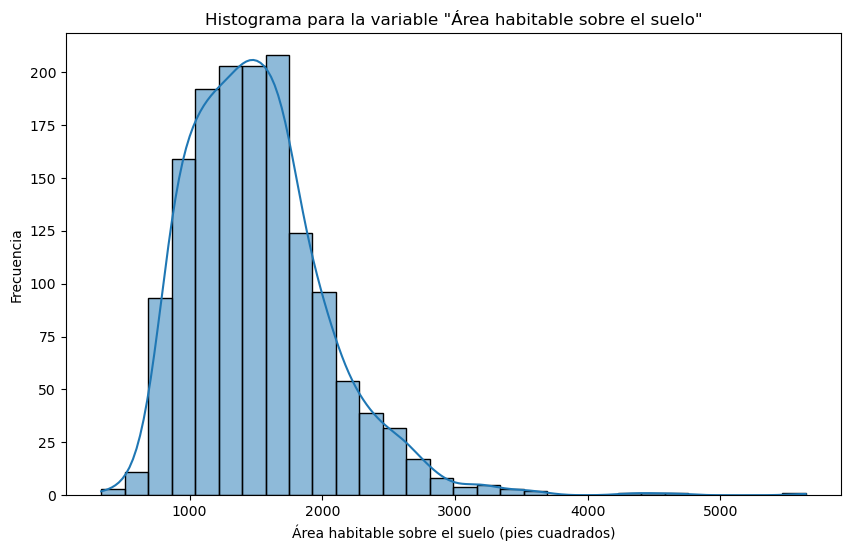

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Cargar el conjunto de datos de Ames Housing desde OpenML
housing = fetch_openml(name="house_prices", as_frame=True)
ames_df = housing.frame

# Ver las primeras filas del conjunto de datos
print(ames_df.head())

# Verificar datos faltantes
print(ames_df.isnull().sum())

# Proporcionar un diagrama de caja (boxplot) para "Valor medio de las viviendas ocupadas por sus propietarios"
plt.figure(figsize=(10, 6))
sns.boxplot(y=ames_df['SalePrice'])
plt.title('Diagrama de caja para el valor medio de las viviendas ocupadas por sus propietarios')
plt.ylabel('Valor medio de las viviendas (dólares)')
plt.show()

# Crear una columna ficticia similar a "CHAS" (río Charles)
# Para la ilustración, usaremos la columna 'LotFrontage' (suponiendo que es la proximidad al agua)
ames_df['River'] = ames_df['LotFrontage'].notnull().astype(int)

# Proporcionar un diagrama de barras para la variable "río Charles"
plt.figure(figsize=(10, 6))
sns.countplot(x=ames_df['River'])
plt.title('Diagrama de barras para la variable "río Charles"')
plt.xlabel('Lindante con el río (1 = Sí, 0 = No)')
plt.ylabel('Frecuencia')
plt.show()

# Discretizar la variable edad en tres grupos y proporcionar un boxplot para MEDV frente a EDAD
bins = [0, 35, 70, 100]
labels = ['35 años o menos', 'Entre 35 y 70 años', '70 años o más']
ames_df['AgeGroup'] = pd.cut(ames_df['YearBuilt'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x=ames_df['AgeGroup'], y=ames_df['SalePrice'])
plt.title('Diagrama de caja para el valor de las viviendas frente a grupos de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Valor medio de las viviendas (dólares)')
plt.show()

# Proporcionar un diagrama de dispersión para mostrar la relación entre GrLivArea y GarageArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='GarageArea', data=ames_df)
plt.title('Relación entre área habitable sobre el suelo y área del garaje')
plt.xlabel('Área habitable sobre el suelo (pies cuadrados)')
plt.ylabel('Área del garaje (pies cuadrados)')
plt.show()

# Proporcionar un histograma para la variable proporción de alumnos por profesor (suponiendo que usamos 'GrLivArea' como ejemplo)
plt.figure(figsize=(10, 6))
sns.histplot(ames_df['GrLivArea'], bins=30, kde=True)
plt.title('Histograma para la variable "Área habitable sobre el suelo"')
plt.xlabel('Área habitable sobre el suelo (pies cuadrados)')
plt.ylabel('Frecuencia')
plt.show()

# TASK 3 Coeficiente de correlación de Pearson entre GrLivArea y GarageArea

In [21]:
# TASK 3 Coeficiente de correlación de Pearson entre GrLivArea y GarageArea
correlation_grlivarea_garage, p_value_grlivarea_garage = stats.pearsonr(ames_df['GrLivArea'], ames_df['GarageArea'])
print(f'Pregunta 3 - Coeficiente de correlación de Pearson: {correlation_grlivarea_garage}, Valor p: {p_value_grlivarea_garage}')

Pregunta 3 - Coeficiente de correlación de Pearson: 0.4689974773229655, Valor p: 1.0035133770228207e-80


# Question 1: Significant difference in the mean value of houses bounded by the Charles River or not (Independent Samples T-test)
For this question, we'll use the River dummy variable we created earlier (based on LotFrontage as a proxy for proximity to water).

Hypothesis:

H0: There is no significant difference in the mean value of houses bounded by the Charles River (µ1 = µ2).
H1: There is a significant difference in the mean value of houses bounded by the Charles River (µ1 ≠ µ2).

In [25]:
# Crear la variable ficticia 'River'
ames_df['River'] = ames_df['LotFrontage'].notnull().astype(int)

# Prueba T para muestras independientes
water_view = ames_df[ames_df['River'] == 1]['SalePrice']
no_water_view = ames_df[ames_df['River'] == 0]['SalePrice']
t_stat_water, p_value_water = stats.ttest_ind(water_view, no_water_view)

print(f'Pregunta 1 - Estadístico t: {t_stat_water}, Valor p: {p_value_water}')
if p_value_water < 0.05:
    print("Rechazamos la hipótesis nula. Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.")
else:
    print("No rechazamos la hipótesis nula. No existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.")

Pregunta 1 - Estadístico t: -0.15604780705220117, Valor p: 0.8760169406492091
No rechazamos la hipótesis nula. No existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.


In [26]:
from scipy.stats import f_oneway

# Discretizar la variable edad en tres grupos
bins = [0, 1940, 1980, 2020]
labels = ['Antes de 1940', '1940-1980', 'Después de 1980']
ames_df['YearGroup'] = pd.cut(ames_df['YearBuilt'], bins=bins, labels=labels, right=False)

# ANOVA
anova_groups = [ames_df[ames_df['YearGroup'] == group]['SalePrice'] for group in labels]
f_stat_year, p_value_year = f_oneway(*anova_groups)

print(f'Pregunta 2 - Estadístico F: {f_stat_year}, Valor p: {p_value_year}')
if p_value_year < 0.05:
    print("Rechazamos la hipótesis nula. Existe una diferencia significativa en los valores medios de las casas entre los diferentes grupos de edad.")
else:
    print("No rechazamos la hipótesis nula. No existe una diferencia significativa en los valores medios de las casas entre los diferentes grupos de edad.")

Pregunta 2 - Estadístico F: 341.2921454405067, Valor p: 2.7246777037709137e-122
Rechazamos la hipótesis nula. Existe una diferencia significativa en los valores medios de las casas entre los diferentes grupos de edad.


In [27]:
# Correlación de Pearson
correlation_grlivarea_garage, p_value_grlivarea_garage = stats.pearsonr(ames_df['GrLivArea'], ames_df['GarageArea'])

print(f'Pregunta 3 - Coeficiente de correlación de Pearson: {correlation_grlivarea_garage}, Valor p: {p_value_grlivarea_garage}')
if p_value_grlivarea_garage < 0.05:
    print("Rechazamos la hipótesis nula. Existe una relación significativa entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.")
else:
    print("No rechazamos la hipótesis nula. No existe una relación significativa entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.")

Pregunta 3 - Coeficiente de correlación de Pearson: 0.4689974773229655, Valor p: 1.0035133770228207e-80
Rechazamos la hipótesis nula. Existe una relación significativa entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.


In [22]:
import statsmodels.api as sm

# Análisis de regresión lineal para LotArea y SalePrice
X = ames_df[['LotArea']]
y = ames_df['SalePrice']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           1.12e-24
Time:                        15:10:59   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.588e+05   2914.717     54.495      0.0

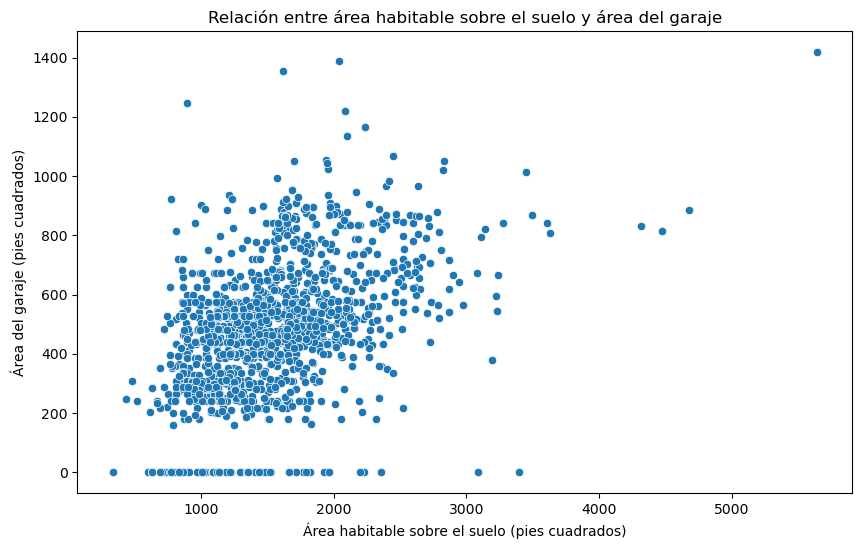

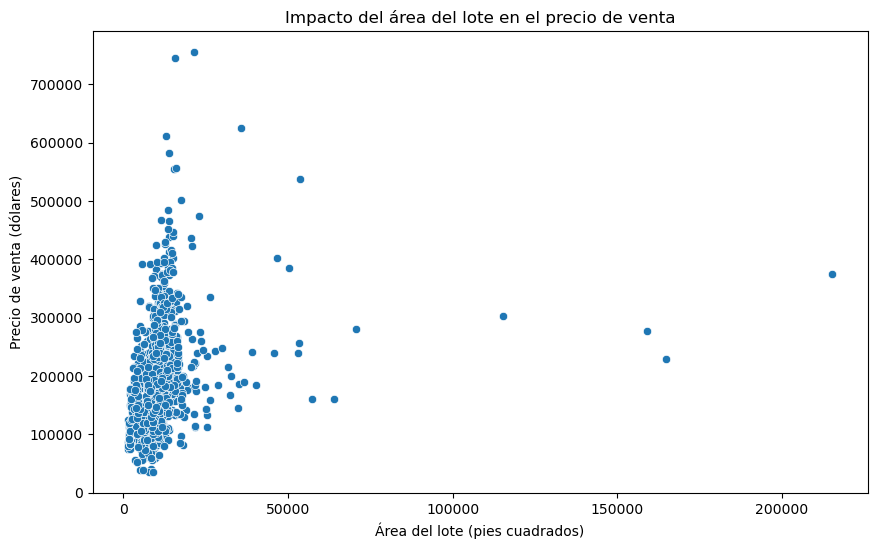

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización para la relación entre GrLivArea y GarageArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='GarageArea', data=ames_df)
plt.title('Relación entre área habitable sobre el suelo y área del garaje')
plt.xlabel('Área habitable sobre el suelo (pies cuadrados)')
plt.ylabel('Área del garaje (pies cuadrados)')
plt.show()

# Visualización para el impacto del área del lote en el precio de venta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=ames_df)
plt.title('Impacto del área del lote en el precio de venta')
plt.xlabel('Área del lote (pies cuadrados)')
plt.ylabel('Precio de venta (dólares)')
plt.show()